In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000)

len(X_train), len(X_test), len(y_train), len(y_test)

(60000, 10000, 60000, 10000)

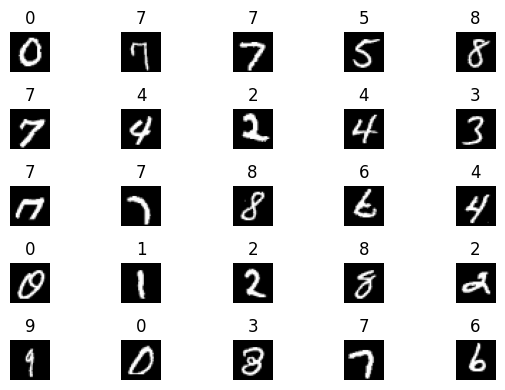

In [2]:
import matplotlib.pyplot as plt
import random

fig = plt.figure(dpi=100)
for ix in range(25):
    ax = plt.subplot(5, 5, ix + 1)
    i = random.randint(0, len(X_train)-1)
    img, label = X_train[i], y_train[i]
    ax.imshow(img.reshape(28, 28), cmap="gray")
    ax.set_title(label)
    ax.axis("off")
plt.tight_layout()
plt.show()

In [3]:
import numpy as np

X_train_3 = X_train[y_train == "3"][:100]
X_train_no_3 = X_train[y_train != "3"][:100]

len(X_train_3), len(X_train_no_3)

(100, 100)

In [6]:
def plot_samples(X):
    fig = plt.figure(dpi=100)
    for ix in range(25):
        ax = plt.subplot(5, 5, ix + 1)
        i = random.randint(0, len(X)-1)
        img = X[i]
        ax.imshow(img.reshape(28, 28), cmap="gray")
        ax.axis("off")
    plt.tight_layout()
    plt.show()

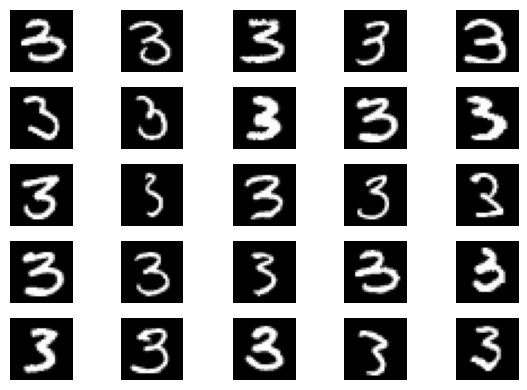

In [7]:
plot_samples(X_train_3)

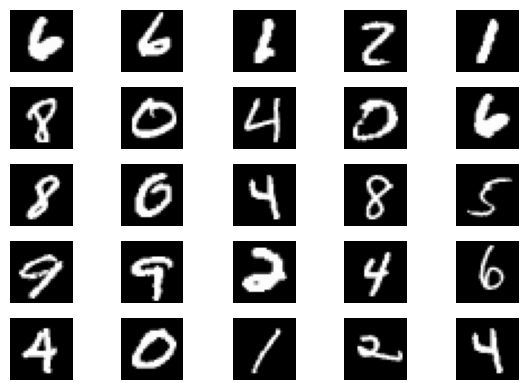

In [8]:
plot_samples(X_train_no_3)

In [9]:
import os
from pathlib import Path
from skimage.io import imsave
import shutil

path = Path("./dataset")

def generate_dataset(X_train_3, X_train_no_3, test_size):
    shutil.rmtree(path)
    os.makedirs(path, exist_ok=True)

    splits = ["train", "test"]
    for split in splits:
        os.makedirs(path / split, exist_ok=True)
        os.makedirs(path / split / "3", exist_ok=True)
        os.makedirs(path / split / "no3", exist_ok=True)
        if split == "train":
            X1, X2 = X_train_3[:-test_size], X_train_no_3[:-test_size]
        else:
            X1, X2 = X_train_3[-test_size:], X_train_no_3[-test_size:]
        for x1, x2 in zip(X1, X2):
            imsave(path / split / "3" / f"{random.randint(0, 99999):05d}.png", x1.reshape(28, 28).astype(np.uint8))
            imsave(path / split / "no3" / f"{random.randint(0, 99999):05d}.png", x2.reshape(28, 28).astype(np.uint8))

In [63]:
nums = [1,2,3]
target = 7

nums.sort()
nums = [n for n in nums if n <= target]
if len(nums) == 0:
    print(0)

all_combs = {n: 1 for n in nums}
target_combs_count = 1 if (target in nums) else 0
max_l = int(target / nums[0])

for i in range(max_l):
    new_all_combs = {}
    for n in nums:
        for comb in all_combs.keys():
            if comb + n == target:
                target_combs_count += 1 * all_combs[comb]
            elif comb + n < target:
                if comb + n in new_all_combs.keys():
                    new_all_combs[comb + n] += all_combs[comb]
                else:
                    new_all_combs[comb + n] = all_combs[comb]
    
    all_combs = new_all_combs.copy()
    print(all_combs)

target_combs_count

{2: 1, 3: 2, 4: 3, 5: 2, 6: 1}
{3: 1, 4: 3, 5: 6, 6: 7}
{4: 1, 5: 4, 6: 10}
{5: 1, 6: 5}
{6: 1}
{}
{}


44

In [56]:
d = {}
d[1] = 3

In [61]:
1 in d.keys()

True